In [53]:
import itertools
import numpy as np
import os
import sys
import time
import math
import matplotlib.pyplot as plt
import warnings 
from PIL import Image, ImageOps
from skimage import exposure
from sklearn.model_selection import train_test_split

warnings.simplefilter('ignore')

%matplotlib inline

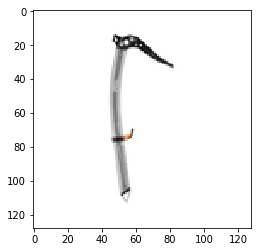

In [54]:
def pad_image(x): #image
    x.shape
    idealSize = 2**( math.floor(np.log2(max(x.shape[0], x.shape[1])))+1 )

    pad = x.shape[0] - x.shape[1]

    padX = idealSize - x.shape[0]
    padY = idealSize - x.shape[1]

    padx_before = padX//2
    padx_after=  idealSize - padx_before - x.shape[0]

    pady_before = padY//2
    pady_after = idealSize - pady_before - x.shape[1]

    newArr = np.pad(x, ((padx_before,padx_after),(pady_before,pady_after),(0,0)),mode='constant', constant_values=255)

    img = Image.fromarray(newArr, 'RGB')
    img2 = img.resize((128,128), Image.ANTIALIAS)
    plt.imshow(img2)
    return img2

def contrast_stretching(img): #img as image
    # Adaptive Equalization
    img_adapteq = exposure.equalize_adapthist(np.asarray(img), clip_limit=0.03)
    return img_adapteq

def preprocess_img(img):
    img1 = pad_image(img)
    img2 = contrast_stretching(img1)
    return img2


features = []
labels = []

for path, subdirs, files in os.walk('gear_images/'):
    for name in files:
        label = path.split('/')[1]
        full_path = os.path.join(path, name)
        img = plt.imread(full_path)
        preprocessed_image = preprocess_img(img).flatten()
        
        features.append(preprocessed_image)
        labels.append(label)

In [55]:
X = np.asarray(features)

# unique_labels = list(set(labels))
# y = [unique_labels.index(a) for a in labels]
# y = np.asarray(y)
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y=labels)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=46)

In [56]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9042386185243328

In [57]:
!wget https://shop.epictv.com/sites/default/files/ae42ad29e70ba8ce6b67d3bdb6ab5c6e.jpeg

--2018-07-16 23:54:40--  https://shop.epictv.com/sites/default/files/ae42ad29e70ba8ce6b67d3bdb6ab5c6e.jpeg
Resolving shop.epictv.com (shop.epictv.com)... 46.137.89.104, 46.137.182.250
Connecting to shop.epictv.com (shop.epictv.com)|46.137.89.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171537 (168K) [image/jpeg]
Saving to: ‘ae42ad29e70ba8ce6b67d3bdb6ab5c6e.jpeg.3’

ae42ad29e70ba8ce6b6 100%[===================>] 167.52K   654KB/s    in 0.3s    

2018-07-16 23:54:41 (654 KB/s) - ‘ae42ad29e70ba8ce6b67d3bdb6ab5c6e.jpeg.3’ saved [171537/171537]



array([7])

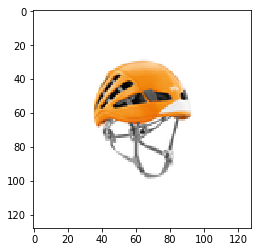

In [58]:
raw_image = plt.imread('ae42ad29e70ba8ce6b67d3bdb6ab5c6e.jpeg')
processed_image = preprocess_img(raw_image).flatten()
prediction = model.predict(processed_image.reshape(1, -1))

# unique_labels[11]
prediction

In [59]:
encoder = LabelEncoder().fit(y=labels)
encoder.inverse_transform(7)

'helmets'

In [60]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 27,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  32,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  4,   0,  82,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  4,   0,   1,  28,   0,   0,   0,   0,   0,   0,   1,   2],
       [  0,   0,   0,   0,  71,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0, 143,   0,   0,   1,   0,   0,   0],
       [  1,   0,   0,   0,   0,   2,  39,   0,   0,   0,   0,   2],
       [  0,   0,   2,   0,   0,   2,   0,  30,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  25,   0,   0,  39,   0,   0,   0],
       [  0,   0,   0,   0,   0,   7,   0,   0,   0,   4,   1,   0],
       [  0,   0,   0,   0,   0,   4,   0,   0,   0,   0,  54,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  27]])

Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.97 0.   0.   0.03 0.   0.   0.   0.   0.   0.   0.  ]
 [0.05 0.   0.95 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.11 0.   0.03 0.77 0.   0.   0.   0.   0.   0.   0.03 0.06]
 [0.   0.   0.   0.   0.99 0.   0.   0.   0.   0.   0.01 0.  ]
 [0.   0.   0.   0.   0.   0.99 0.   0.   0.01 0.   0.   0.  ]
 [0.02 0.   0.   0.   0.   0.05 0.88 0.   0.   0.   0.   0.05]
 [0.   0.   0.06 0.   0.   0.06 0.   0.88 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.39 0.   0.   0.61 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.59 0.   0.   0.   0.33 0.08 0.  ]
 [0.   0.   0.   0.   0.   0.07 0.   0.   0.   0.   0.93 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]


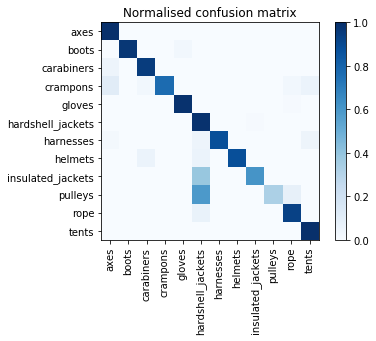

In [64]:
# Plot the normalised confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis],2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    # Get current size
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    plt.figure(figsize = (20,14))
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

class_names = [encoder.inverse_transform(i) for i in range(12)]

plot_confusion_matrix(cm_normalised, classes=class_names, normalize=True, title='Normalised confusion matrix')

In [2]:
import os
print(os.getcwd())

/home/destroyer/notebooks/Hackathon
